## **1. PROBLEM DEFINITION**
Vấn đề: Cho biết những đặc điểm nào có tác động mạnh tới giá trị của một căn nhà và dự đoán giá của một căn nhà dựa trên các đặc điểm đã biết của căn nhà đó.

Đầu vào: số phòng ngủ (bedrooms), số phòng tắm (bathrooms), diện tích sử dụng để sinh sống (sqft_living), diện tích đất tổng thể (sqft_lot), số tầng (floors), mặt nhà có hướng sông hay không (waterfront), đánh giá cảnh quan (view), tình trạng tổng thể căn nhà (condition), chất lượng thiết kế và xây dựng của căn nhà (grade), diện tích bên trên mặt đất (sqft_above), diện tích tầng hầm (sqft_basement), năm xây dựng (yr_build), năm cải tạo (yr_renovated), mã vùng (zipcode), tọa độ địa lý (lat, long), trung bình diện tích sử dụng của 15 nhà lận cận (sqft_living15), trung bình diện tích đất tổng thể của 15 nhà lận cận (sqft_lot15).

Đầu ra: Giá căn nhà (price).

Bài toán dự đoán giá nhà là một loại bài toán hồi quy trong học máy, trong đó mục tiêu là dự đoán giá của một căn nhà dựa trên các đặc điểm đã biết của căn nhà đó, ứng dụng trong dự đoán giá bất động sản, hỗ trợ người mua và người bán đưa ra quyết định tốt hơn, làm cơ sở cho các hệ thống khuyến nghị hoặc phân tích đầu tự liên quan tới bất động sản, ...

## **2. DATA ACQUISITION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/house_pricing.csv')

| Cột | Mô tả |
|:----|:-----|
| **id** | Mã định danh duy nhất cho mỗi căn nhà. |
| **date** | Ngày đăng bán nhà (ví dụ: 20140502T000000). |
| **price** | Giá bán của căn nhà (USD). |
| **bedrooms** | Số lượng phòng ngủ trong căn nhà. |
| **bathrooms** | Số lượng phòng tắm trong căn nhà (có thể là số thập phân, ví dụ: 2.5 là 2 phòng tắm và 1 toilet). |
| **sqft_living** | Diện tích khu vực sinh hoạt tính theo foot vuông (sqft). |
| **sqft_lot** | Diện tích toàn bộ khu đất tính theo foot vuông (sqft). |
| **floors** | Số tầng của căn nhà. |
| **waterfront** | Căn nhà có nằm bên bờ nước hay không (1: Có, 0: Không). |
| **view** | Mức độ đẹp của tầm nhìn (0 đến 4). |
| **condition** | Tình trạng tổng thể của căn nhà (1: rất tệ, 5: rất tốt). |
| **grade** | Đánh giá chất lượng thiết kế và xây dựng (1 đến 13). |
| **sqft_above** | Diện tích phần trên mặt đất (không tính tầng hầm). |
| **sqft_basement** | Diện tích tầng hầm (nếu có, đơn vị sqft). |
| **yr_built** | Năm xây dựng căn nhà. |
| **yr_renovated** | Năm cải tạo (nếu chưa cải tạo thì bằng 0). |
| **zipcode** | Mã vùng bưu điện khu vực căn nhà. |
| **lat** | Vĩ độ của căn nhà. |
| **long** | Kinh độ của căn nhà. |
| **sqft_lot15** | Diện tích khu đất trung bình (cũng tính bằng feet vuông) của 15 căn nhà gần nhất. |
| **sqft_living15** | Diện tích sàn nhà trung bình (tính bằng feet vuông) của 15 căn nhà gần nhất (hàng xóm lân cận). |

## **3 - 4. DATA PREPROCESSING - EXPLORATORY DATA ANALYSIS**

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900$,-3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,-538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21617 entries, 0 to 21616
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21617 non-null  int64  
 1   date           21617 non-null  object 
 2   price          21617 non-null  object 
 3   bedrooms       21617 non-null  int64  
 4   bathrooms      21617 non-null  float64
 5   sqft_living    21617 non-null  int64  
 6   sqft_lot       21617 non-null  int64  
 7   floors         21617 non-null  float64
 8   waterfront     21617 non-null  int64  
 9   view           21617 non-null  int64  
 10  condition      21617 non-null  int64  
 11  grade          21617 non-null  int64  
 12  sqft_above     21617 non-null  int64  
 13  sqft_basement  21617 non-null  int64  
 14  yr_built       21617 non-null  int64  
 15  yr_renovated   914 non-null    float64
 16  zipcode        21617 non-null  int64  
 17  lat            21617 non-null  float64
 18  long  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21617.0,4.579679e+09,2.876673e+09,1.000102e+06,2.123049e+09,3.904921e+09,7.308900e+09,9.900000e+09
bedrooms,21617.0,3.369709e+00,9.334659e-01,-4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21617.0,2.114586e+00,7.702642e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21617.0,2.079573e+03,9.188035e+02,-5.400000e+02,1.422000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21617.0,1.510444e+04,4.141709e+04,5.200000e+02,5.040000e+03,7.617000e+03,1.068700e+04,1.651359e+06
floors,21617.0,1.494403e+00,5.399827e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21617.0,7.540362e-03,8.650925e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21617.0,2.342601e-01,7.662533e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21617.0,3.409354e+00,6.507067e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21617.0,7.656798e+00,1.175378e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


Cột bedrooms, sqft_living, yr_built có giá trị âm, điều này không hợp lệ nên cần sửa lại thành giá trị không âm

In [7]:
for col in ['bedrooms','sqft_living','yr_built']:
    df[col] = df[col].abs()

In [8]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Cột yr_renovated có 20703 giá trị NaN, điều này nghĩa là có những căn nhà chưa bao giờ cải tạo, ta thay giá trị 0 cho giá trị NaN

In [9]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [10]:
df['date'].value_counts()

,count
date,
20140623T000000,143
20140626T000000,131
20140625T000000,131
20140708T000000,127
20150427T000000,126
...,...
20150515T000000,1
20141102T000000,1
20141130T000000,1


In [11]:
# Sử dụng regex để kiểm tra định dạng chính xác
valid_dates = df[df['date'].str.match(r'^20\d{6}T000000$')]
valid_dates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900$,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,-538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0.0,98144,47.5941,-122.299,1020,1357
21613,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21614,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287
21615,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0.0,98144,47.5941,-122.299,1020,1357


Có 21617 hàng trong dataframe valid_dates bằng với số hàng ban đầu, nghĩa là định dạng thời gian cho cột date là YYYYMMDDT000000

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['date'].isna().sum()

np.int64(0)

Kết quả bằng 0 nghĩa là tất cả đều được chuyển thành kiểu datetime hợp lệ

Cột price có kiểu là object thay vì kiểu float hay int, nghĩa là các giá trị của cột này có các kí tự đặc biệt

In [13]:
df['price'].head(10)

,price
0,221900$
1,-538000
2,180000
3,604000
4,510000
5,1.225e+006
6,-257500
7,291850
8,229500
9,323000


In [14]:
df['price_copy'] = df['price']
df['price_copy'] = df['price_copy'].str.replace('$','')
df['price_copy'] = pd.to_numeric(df['price_copy'], errors='coerce').abs()
df['price_copy'].describe()

,price_copy
count,2.161600e+04
mean,5.550780e+05
std,2.237179e+06
min,7.500000e+04
25%,3.219875e+05
50%,4.500000e+05
75%,6.450000e+05
max,3.250000e+08


Số lượng giá trị của cột price_copy chỉ có 21616, thiếu 1 so với ban đầu, nghĩa là có một ô bị NaN vì không chuyển sang kiểu số học được

In [15]:
df[df['price_copy'].isna()]['price']

,price
17,485000usd


In [16]:
df['price'] = df['price'].str.replace('$','').str.replace('usd','')
df['price'] = pd.to_numeric(df['price'], errors='coerce').abs()
df.drop(columns=['price_copy'],inplace=True)
df['price'].describe()

,price
count,2.161700e+04
mean,5.550748e+05
std,2.237127e+06
min,7.500000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,3.250000e+08


In [17]:
df[['bedrooms','bathrooms']].describe()

,bedrooms,bathrooms
count,21617.000000,21617.000000
mean,3.370634,2.114586
std,0.930119,0.770264
min,0.000000,0.000000
25%,3.000000,1.750000
50%,3.000000,2.250000
75%,4.000000,2.500000
max,33.000000,8.000000


Cột bedrooms có giá trị 33 phòng ngủ, nghĩa là có thể đây là một giá trị ngoại lai hoặc lỗi nhập liệu.

In [18]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700


Cột bathrooms có một số giá trị thập phân, điều này có nghĩa là các phòng tắm đó có thể không hoàn chỉnh, ví dụ 2.5 = 2 phòng tắm + 1 phòng tắm chỉ có toilet và bồn rửa mặt mà không có bồn tắm hay vòi sen, hay 2.25 = 2 phòng tắm + 1 phòng chỉ có toilet, 1.75 = 1 phòng tắm + 1 phòng tắm có toilet, chậu rửa mặt, vòi sen nhưng không có bồn tắm, ...

In [19]:
df[(df['price'] >= 600000) & (df['price'] <= 700000)]['bedrooms'].value_counts()

,count
bedrooms,
4,838
3,833
5,164
2,153
6,41
1,7
8,2
10,2
9,1


Các căn nhà có giá thuộc khoảng 600000 đến 700000 có số phòng ngủ đa số là 3 và 4, do đó giá trị 33 là do lỗi nhập liệu, nên cần sửa lại thành 3 phòng ngủ

In [20]:
df.loc[df['bedrooms'] == 33, 'bedrooms'] = 3

In [21]:
sqft_type = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
df[sqft_type].describe().T

,count,mean,std,min,25%,50%,75%,max
sqft_living,21617.0,2079.730444,918.446582,290.0,1422.0,1910.0,2550.0,13540.0
sqft_lot,21617.0,15104.444696,41417.094796,520.0,5040.0,7617.0,10687.0,1651359.0
sqft_above,21617.0,1788.275339,828.064819,290.0,1190.0,1560.0,2210.0,9410.0
sqft_basement,21617.0,291.455105,442.551855,0.0,0.0,0.0,560.0,4820.0
sqft_living15,21617.0,1986.391682,685.433674,399.0,1490.0,1840.0,2360.0,6210.0
sqft_lot15,21617.0,12766.370912,27302.083599,651.0,5100.0,7620.0,10083.0,871200.0


Biến sqft_basement có hơn 50% dữ liệu có giá trị 0, nghĩa là biến này nên được chuyển thành biến phân loại với 1 = có tầng hầm, 0 = không có tầng hầm, sau đó xóa cột này khỏi dataframe

In [22]:
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df = df.drop('sqft_basement', axis = 1)

In [23]:
for col in ['floors','waterfront','view','grade','condition']:
    print(f'* {df[col].value_counts()}')
    print('-' * 50)

* floors
1.0    10680
2.0     8245
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64
--------------------------------------------------
* waterfront
0    21454
1      163
Name: count, dtype: int64
--------------------------------------------------
* view
0    19493
2      963
3      510
1      332
4      319
Name: count, dtype: int64
--------------------------------------------------
* grade
7     8984
8     6069
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
--------------------------------------------------
* condition
3    14035
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64
--------------------------------------------------


Tương tự cho các cột floors, waterfront, view, grade, condition cũng chưa thể hiện điều bất thường

In [24]:
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0
21613,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21614,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,2004,0.0,98027,47.5345,-122.069,1410,1287,0
21615,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0


In [25]:
df = df.drop_duplicates(keep='first')

In [26]:
df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,1939,0.0,98117,47.6870,-122.386,1570,4500,1
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1997,0.0,98006,47.5503,-122.102,3860,11244,1
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,1922,1984.0,98146,47.4957,-122.352,1820,7460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,1933,0.0,98133,47.7076,-122.342,1130,1598,0
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,2013,0.0,98065,47.5184,-121.886,2850,6000,0
21581,7853420110,2015-05-04,625000.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,2013,0.0,98065,47.5184,-121.886,2850,6000,0
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0


Có sự trùng lặp id cho một căn nhà, điều này cho thấy căn nhà được đăng bán 2 lần, ta vẫn giữ lại càng hàng trùng lặp và xem chúng như một hàng riêng biệt

OUTLIERS DETECTION

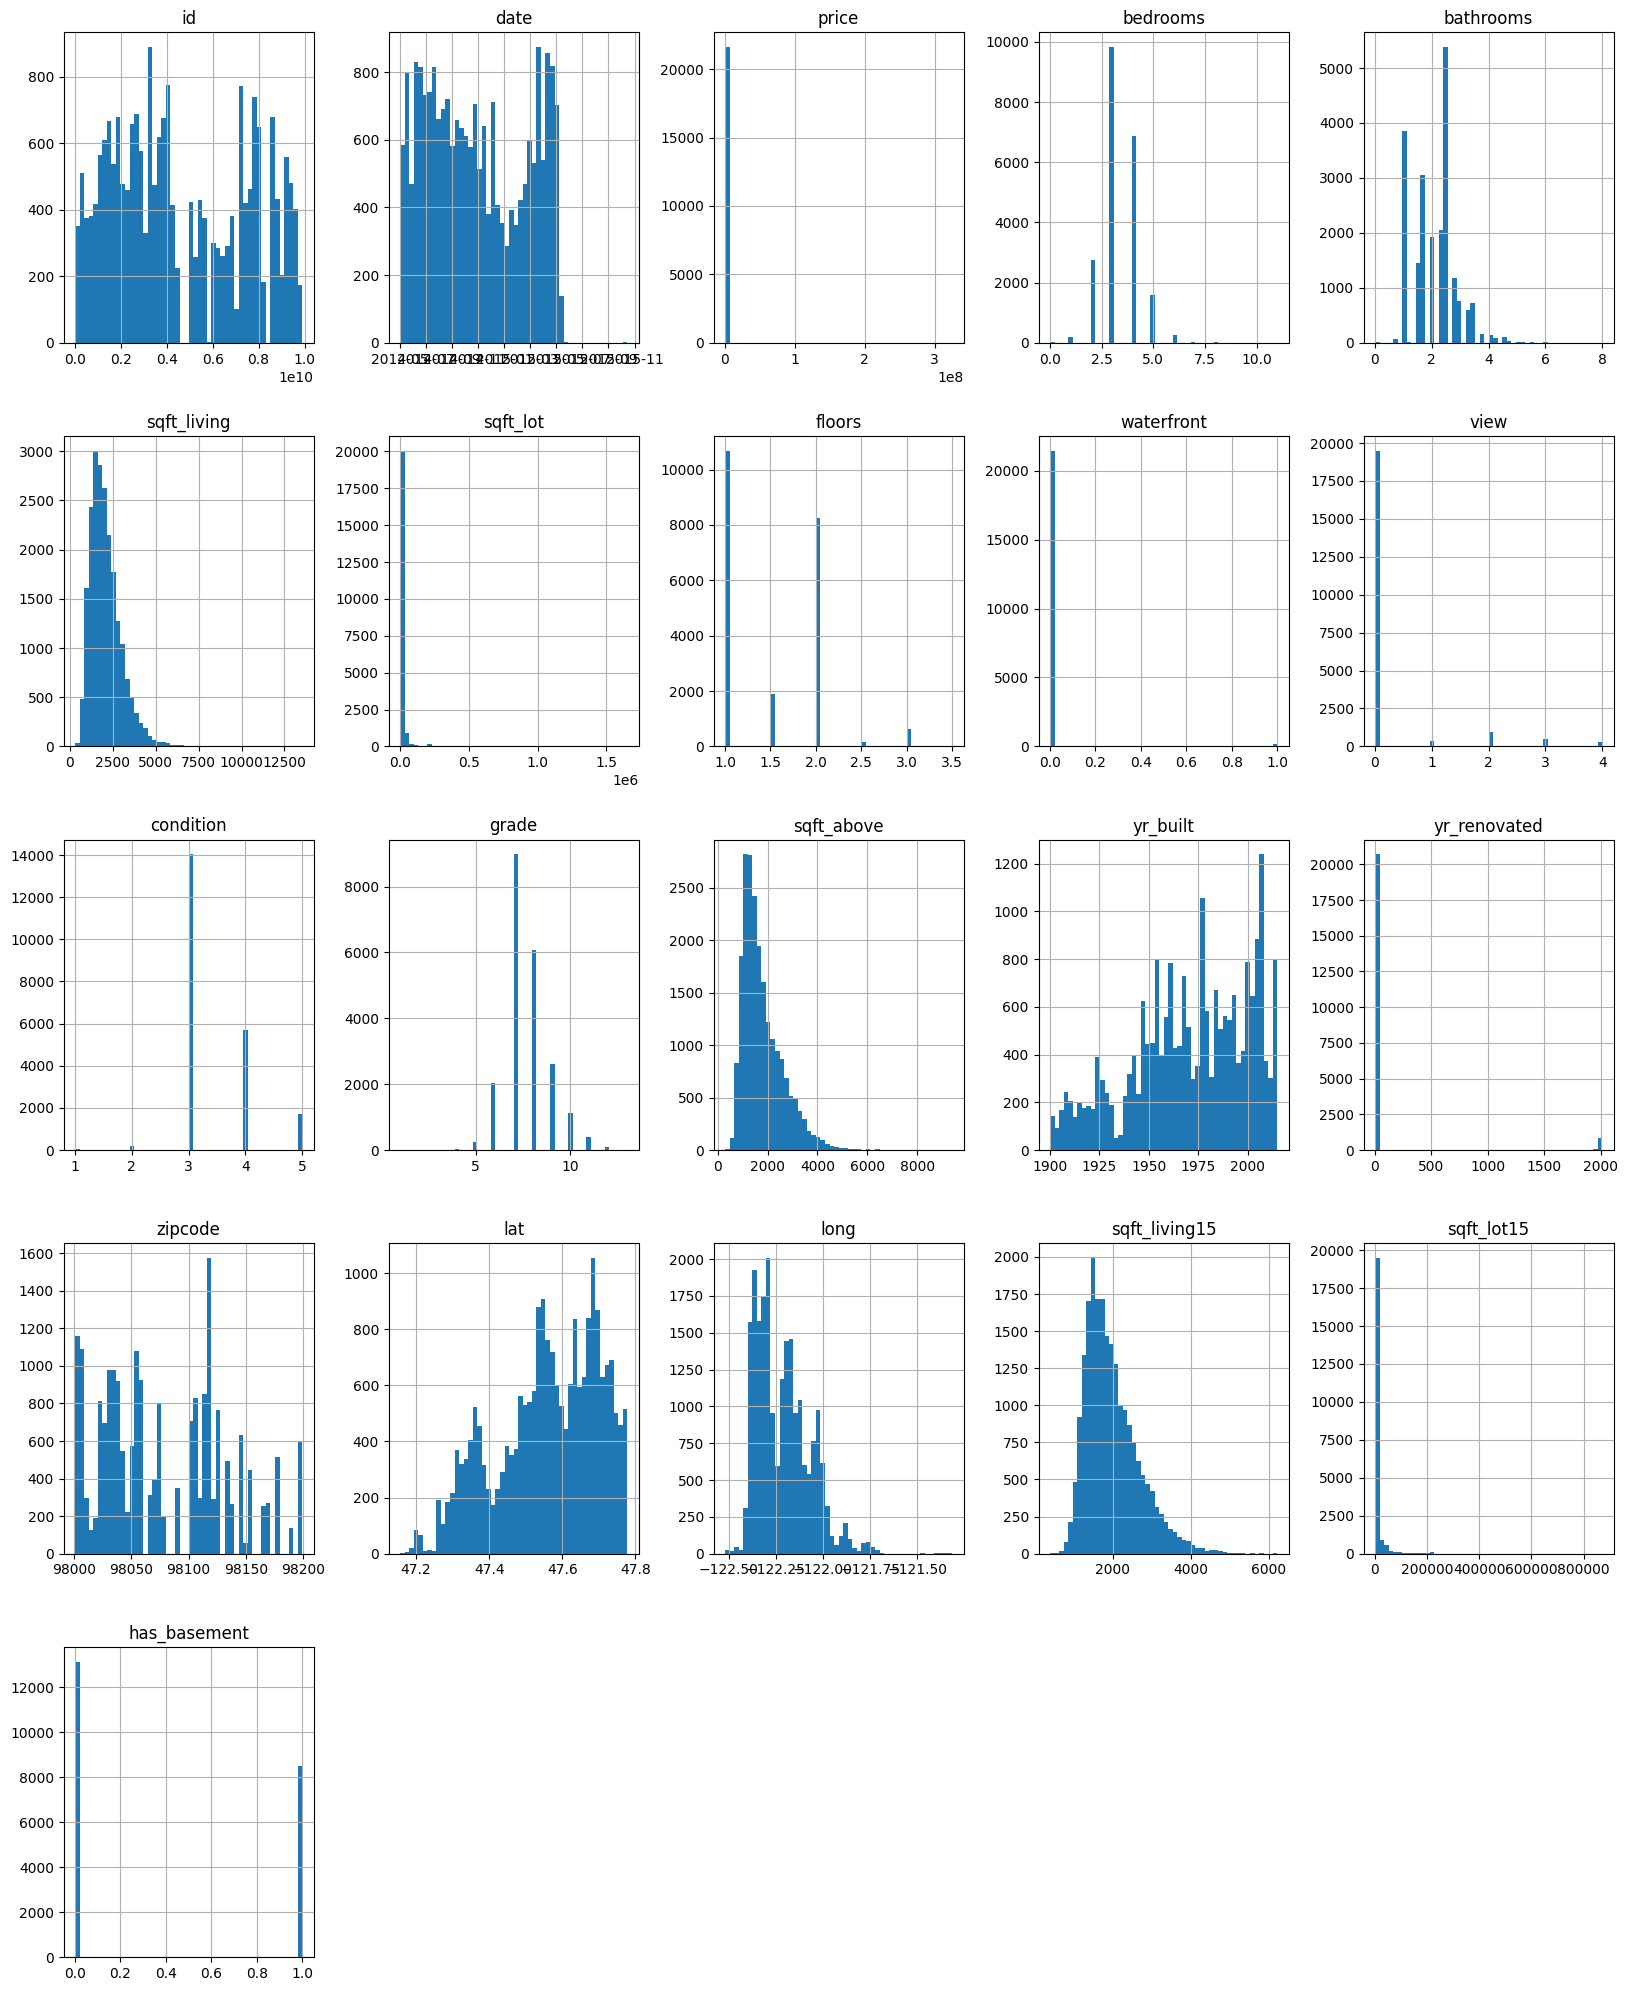

In [27]:
df.hist(figsize=(20,25), bins=50)
plt.show()

Các biến diện tích (sqft-type) có phân phối dữ liệu gần giống phân phối chuẩn trong đó có tồn tại các giá trị ngoại lại làm cho phân phối bị lệch phải. Ngoại trừ biến sqft_basement có rất nhiều giá trị 0 vì có những căn nhà không có tầng hầm.
Biến waterfront chỉ có giá trị 0 hoặc 1 biểu thị cho việc phân loại.
Các biến view, condition, grade thể hiện mức độ đánh giá cho các tiêu chí của căn nhà

In [28]:
df['price_zscore'] = zscore(df['price'])
df[df['price_zscore'].abs() > 3]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,price_zscore
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,1910,1987.0,98102,47.6298,-122.323,3940,8800,1,3.193638
21616,1523300157,2015-10-15,325000000.0,2,0.75,1020,1077,2.0,0,0,...,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0,145.020854


In [29]:
df[df['id'].isin([6762700020,1523300157])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,price_zscore
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,1910,1987.0,98102,47.6298,-122.323,3940,8800,1,3.193638
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0,-0.102850
21616,1523300157,2015-10-15,325000000.0,2,0.75,1020,1077,2.0,0,0,...,1020,2008,0.0,98144,47.5941,-122.299,1020,1357,0,145.020854


id 1523300157 bị trùng vì lỗi nhập liệu nên ta xóa hàng này đi. Đồng thời id 6762700020 có price bằng 7700000 cũng là một giá trị ngoại lai nên ta cũng xóa nó đi

In [30]:
df = df.drop(df[df['price'].isin([7700000,325000000])].index)
df = df.drop(columns=['price_zscore'])

In [31]:
sqft_type = ['sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']
sqft_col_zscore = []
for col in sqft_type:
    sqft_col_zscore.append(col + '_zscore')
    df[col + '_zscore'] = zscore(df[col])

In [32]:
for col in sqft_col_zscore:
    print(f'* {col}')
    print(df[df[col].abs() > 3][col].describe())
    print('-' * 50)

* sqft_living_zscore
count    251.000000
mean       4.043531
std        1.144830
min        3.003015
25%        3.308714
50%        3.701755
75%        4.337719
max       12.512440
Name: sqft_living_zscore, dtype: float64
--------------------------------------------------
* sqft_lot_zscore
count    347.000000
mean       6.193321
std        4.073674
min        3.000588
25%        4.454085
50%        4.893567
75%        6.148757
max       39.503521
Name: sqft_lot_zscore, dtype: float64
--------------------------------------------------
* sqft_above_zscore
count    260.000000
mean       3.842497
std        0.973143
min        3.001824
25%        3.195340
50%        3.521898
75%        4.114541
max        9.218525
Name: sqft_above_zscore, dtype: float64
--------------------------------------------------
* sqft_living15_zscore
count    237.000000
mean       3.662870
std        0.609956
min        3.011310
25%        3.215611
50%        3.522063
75%        3.945259
max        6.163387
Name: 

Tất cả các cột kiểu diện tích (sqft-type) đều có khoảng từ 250-360 giá trị ngoại lại, có một số giá tị ngoại lai cực kỳ cao và tất cả các giá trị ngoại lai đều làm cho phân phối dữ liệu của các cột này lệch phải => Xóa các giá trị ngoại lai này để giảm ảnh hưởng tới mô hình dự đoán

In [33]:
for col in sqft_col_zscore:
    df = df[df[col].abs() <= 3]

df = df.drop(columns=sqft_col_zscore)

CORRELATION ANALYSIS

<ipython-input-34-2128395894>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bedrooms'], y=df['price'], palette='RdYlBu')


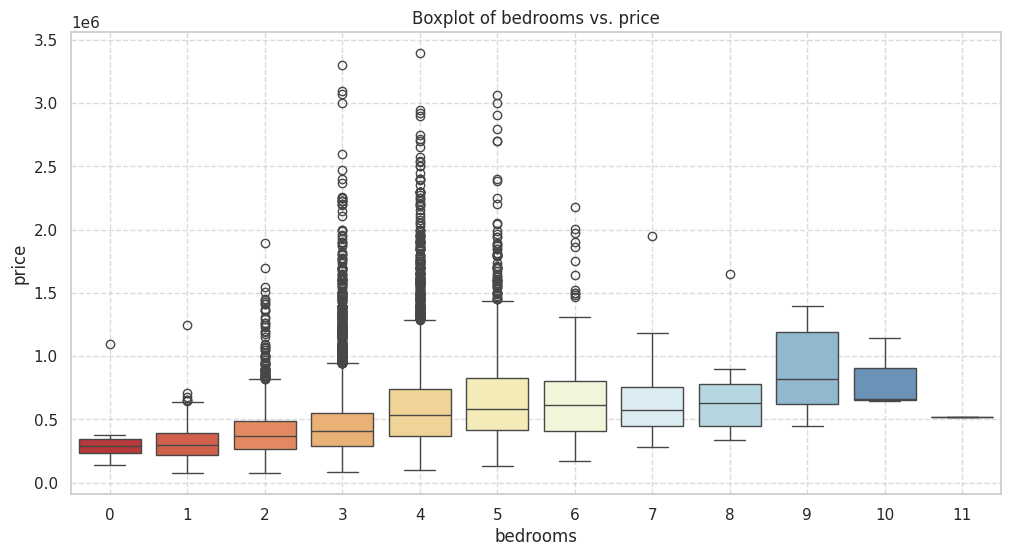

In [34]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['bedrooms'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'bedrooms'} vs. price")
plt.ylabel("price")
plt.xlabel(f"bedrooms")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Ta thấy rằng số lượng phòng ngủ càng cao thì giá căn nhà cũng càng cao

<ipython-input-35-402636687>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['bathrooms'], y=df['price'], palette='RdYlBu')


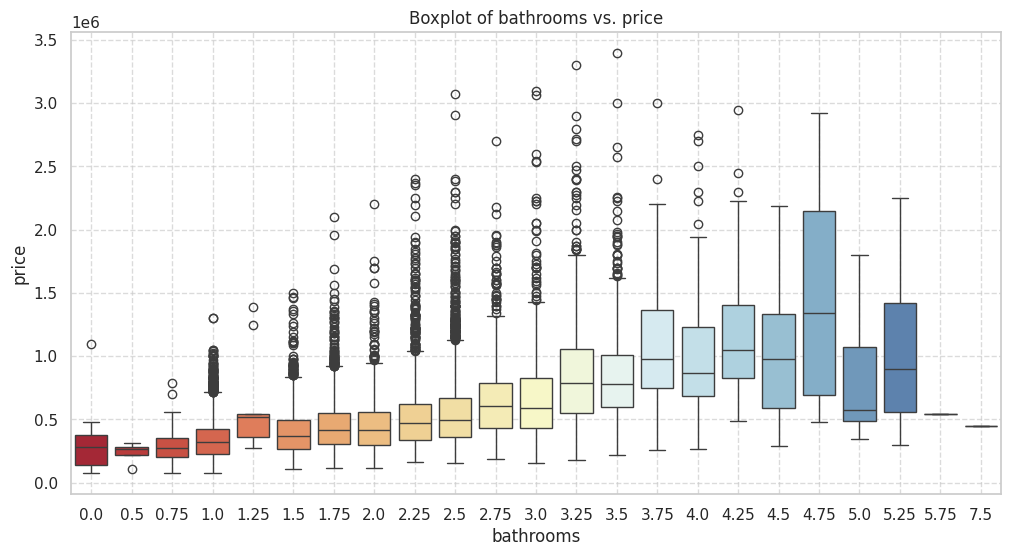

In [35]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['bathrooms'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'bathrooms'} vs. price")
plt.ylabel("price")
plt.xlabel(f"bathrooms")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Tương tự cho số phòng tắm, càng nhiều phòng tắm thì giá căn nhà càng cao

<ipython-input-36-3575344446>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['floors'], y=df['price'], palette='RdYlBu')


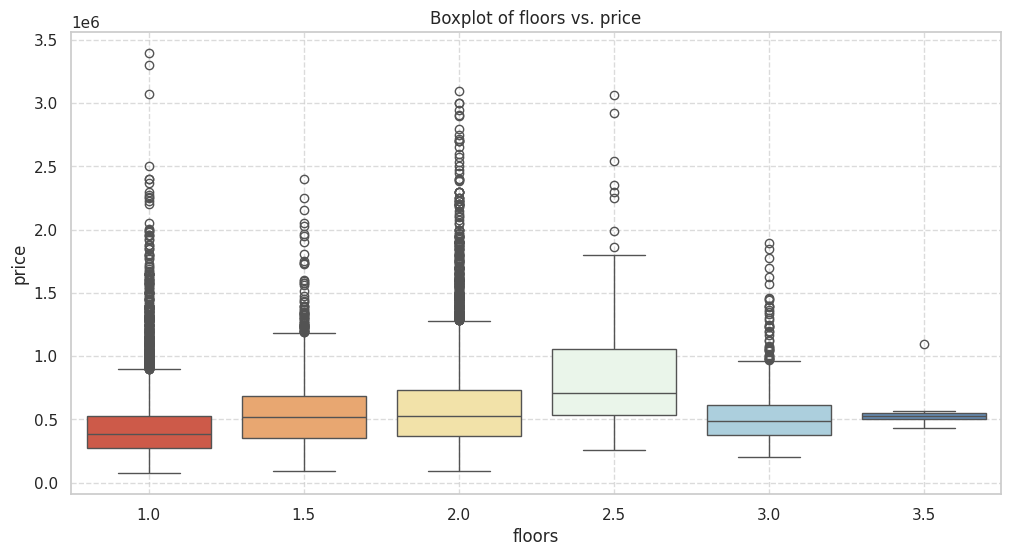

In [36]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['floors'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'floors'} vs. price")
plt.ylabel("price")
plt.xlabel(f"floors")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Ta thấy rằng các căn nhà có 2,5 tầng có giá trung bình cao hơn hết, điều này cho thấy người mua có xu hướng mua các căn nhà có số tầng vừa đủ, không quá lớn nhưng đầy đủ tiện nghi. Có nhiều căn nhà với 1 tầng nhưng giá rất cao vì có thể có những yếu tố khác ảnh hướng tới giá các căn nhà có 1 tầng này.

<ipython-input-37-3307340771>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['view'], y=df['price'], palette='RdYlBu')


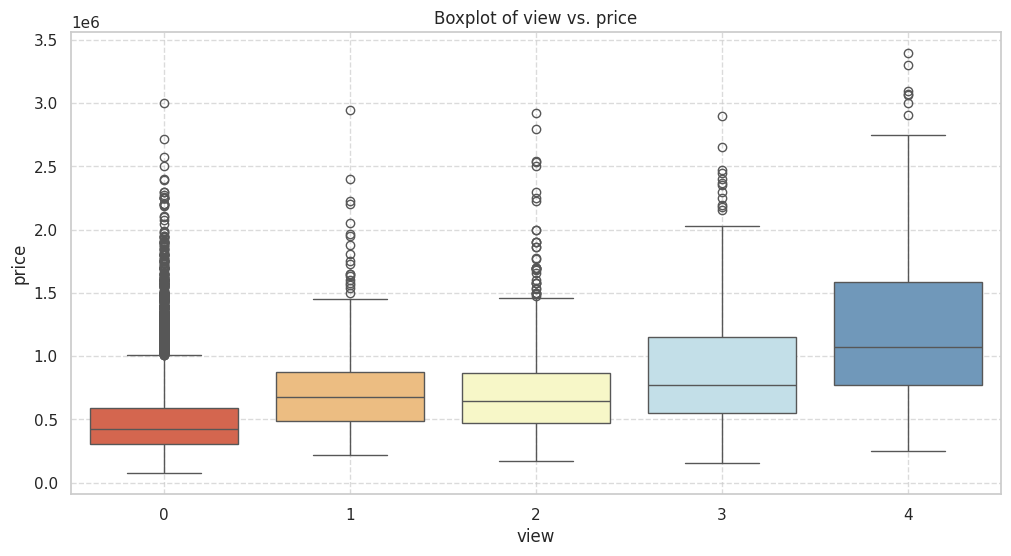

In [37]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['view'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'view'} vs. price")
plt.ylabel("price")
plt.xlabel(f"view")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Rõ ràng là các căn nhà có tầm nhìn (view) được đánh giá cao hơn thì sẽ có giá cao hơn.

<ipython-input-38-3452198010>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['grade'], y=df['price'], palette='RdYlBu')


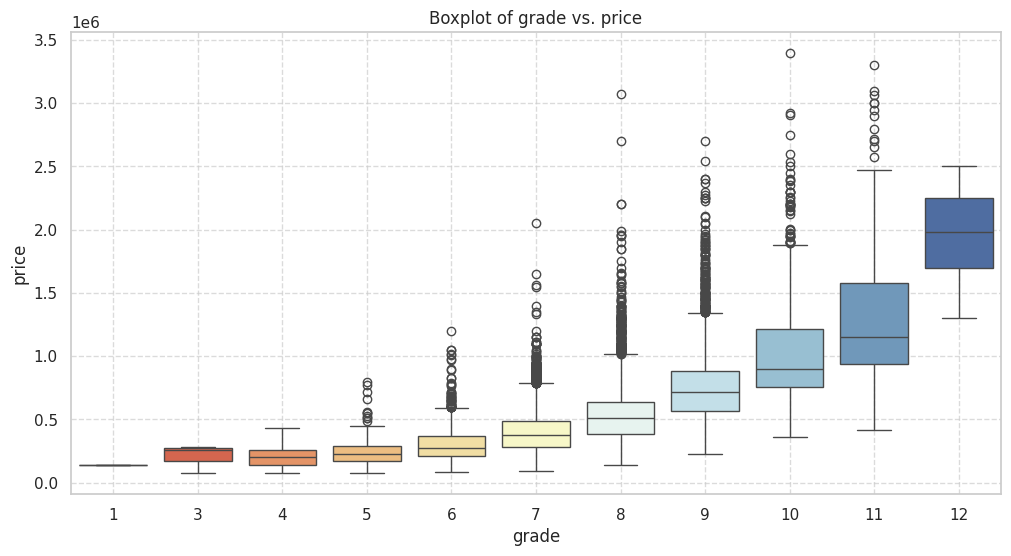

In [38]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['grade'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'grade'} vs. price")
plt.ylabel("price")
plt.xlabel(f"grade")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Chất lượng thiết kế và xây dựng (grade) ảnh hưởng nhiều đến giá căn nhà, chất lượng càng tốt thì giá càng cao.

<ipython-input-39-325984214>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['condition'], y=df['price'], palette='RdYlBu')


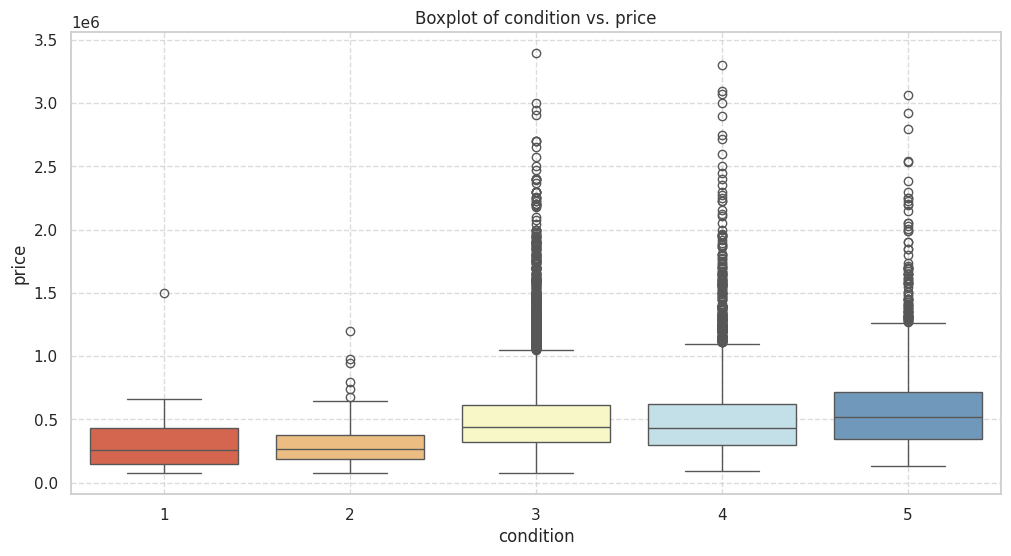

In [39]:
sns.set_style('whitegrid')
sns.set_context('notebook')

plt.figure(figsize=(12,6))
sns.boxplot(x=df['condition'], y=df['price'], palette='RdYlBu')
plt.title(f"Boxplot of {'condition'} vs. price")
plt.ylabel("price")
plt.xlabel(f"condition")
plt.grid(True, linestyle='--', alpha=.7)
plt.show()

Tình trạng tổng thể phản ảnh tích cực giá trị căn nhà, chỉ số tình trạng càng lớn thì giá càng cao.

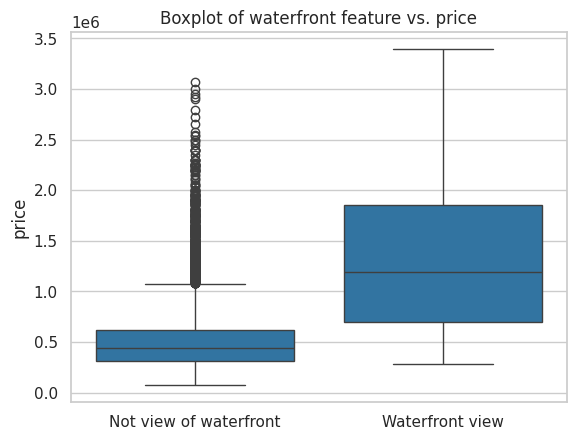

In [40]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [41]:
waterfront_mean = df[df['waterfront']==1]['price'].mean()
non_waterfront_mean = df[df['waterfront']==0]['price'].mean()
print(f'Mean price of house with waterfont: {round(waterfront_mean, 2)}')
print(f'Mean price of house without waterfont: {round(non_waterfront_mean, 2)}')
print(waterfront_mean/non_waterfront_mean)

Mean price of house with waterfont: 1322872.81
Mean price of house without waterfont: 507698.11
2.605628766328065


In [42]:
print(f"Proportion of house with waterfront: {round(len(df[df['waterfront']==1])/len(df) * 100, 3)}%")

Proportion of house with waterfront: 0.623%


Giá những căn nhà có mặt hướng ra sông có giá cao hơn gần 2,6 lần so với giá những căn nhà không có đặc điểm này, nghĩa là biến waterfront có ảnh hưởng đến gía nhà. Nhưng cần lưu ý rằng số lượng căn nhà có mặt hướng ra sông chỉ chiếm rất nhỏ 0.623% tập dữ liệu, điều này gây ra sự mất cân bằng lớn

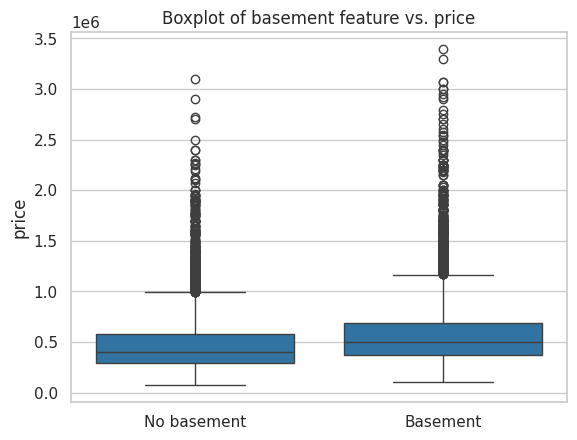

In [43]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['has_basement'], y = df['price'])
plt.title("Boxplot of basement feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No basement', 'Basement'))
plt.show()

In [44]:
basement_mean = df[df['has_basement']==1]['price'].mean()
non_basement_mean = df[df['has_basement']==0]['price'].mean()
print(f'Mean price of house with basement: {round(basement_mean, 2)}')
print(f'Mean price of house without basement: {round(non_basement_mean, 2)}')
print(basement_mean/non_basement_mean)
print(f"Proportion of house with basement: {round(len(df[df['has_basement']==1])/len(df) * 100, 3)}%")

Mean price of house with basement: 583518.82
Mean price of house without basement: 467027.06
1.24943258049526
Proportion of house with basement: 39.275%


Giá các căn nhà có tầng hầm cao gấp 1,25 lần so với giá các căn nhà không có tầng hầm, nghĩa là việc có tầng hầm hay không cũng ảnh hưởng tới giá giá của căn nhà.

Ta tiếp tục xem xét ảnh hưởng của hai biến sqft_living và sqft_lot tới giá trị căn nhà.


Correlation Coefficient Pearson: 0.640


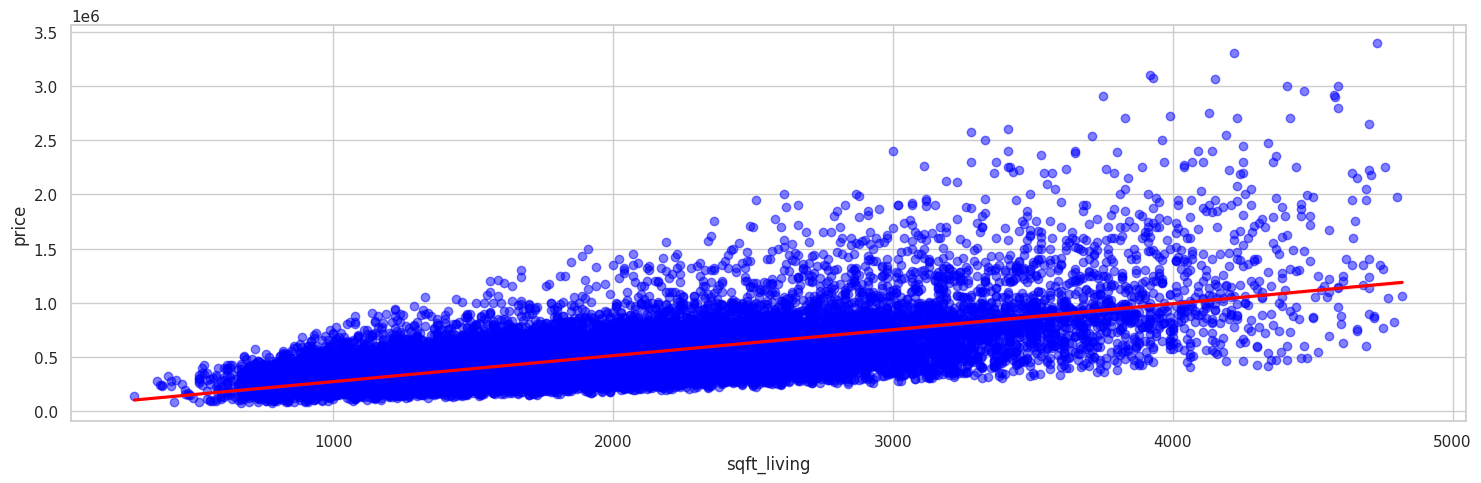

In [45]:
correlation = df['sqft_living'].corr(df['price'])
print(f"\nCorrelation Coefficient Pearson: {correlation:.3f}")

# Check distribution of each variables
plt.figure(figsize=(15, 5))

sns.regplot(x='sqft_living', y='price', data=df,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color': 'red'})

plt.tight_layout()
plt.show()

Hệ số tương quan giữa hai biến sqft_living và price khá cao (0.64) và đường hồi quy nằm trong các điểm dữ liệu nghĩa là hai biến này có mối quan hệ tuyến tính với nhau, diện tích sống tăng thì giá nhà cũng có xu hướng tăng và ngược lại.


Correlation Coefficient Pearson: 0.100


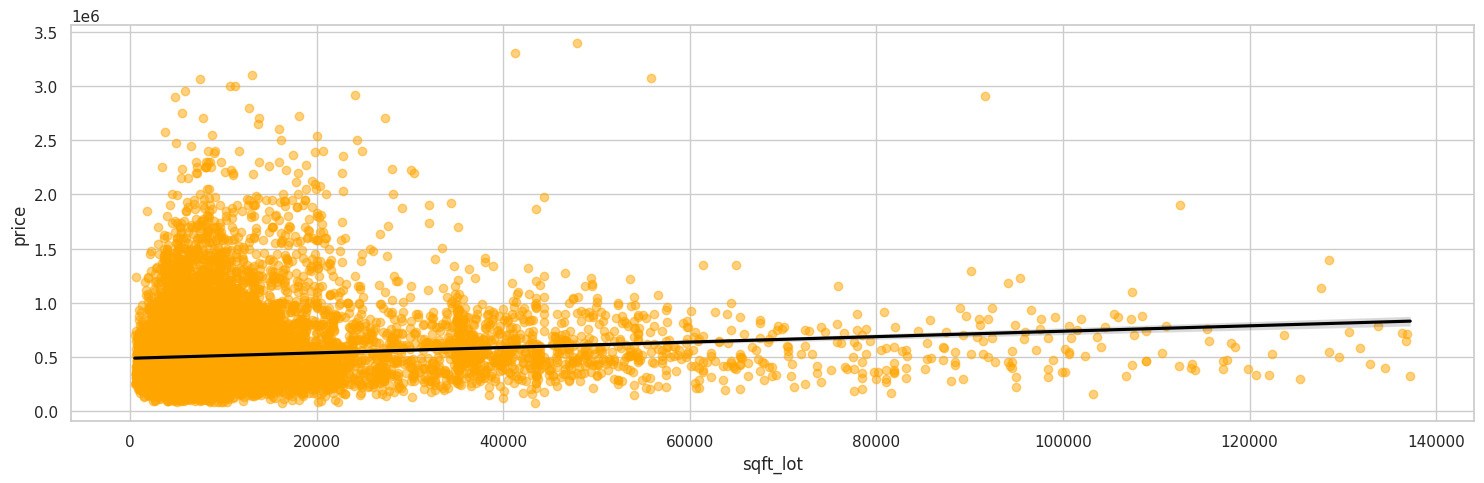

In [46]:
correlation = df['sqft_lot'].corr(df['price'])
print(f"\nCorrelation Coefficient Pearson: {correlation:.3f}")

# Check distribution of each variables
plt.figure(figsize=(15, 5))

sns.regplot(x='sqft_lot', y='price', data=df,
            scatter_kws={'alpha':0.5, 'color':'orange'},
            line_kws={'color': 'black'})

plt.tight_layout()
plt.show()

Hệ số tương quan chỉ giữa hai biến này chỉ có 0.1, nghĩa là người mua hầu như chỉ quan tâm đến diện tích đất có thể sử dụng hơn là diện tích tổng đất tổng thể, diện tích đất lớn không đảm bảo giá trị căn nhà cao.


Correlation Coefficient Pearson: 0.528


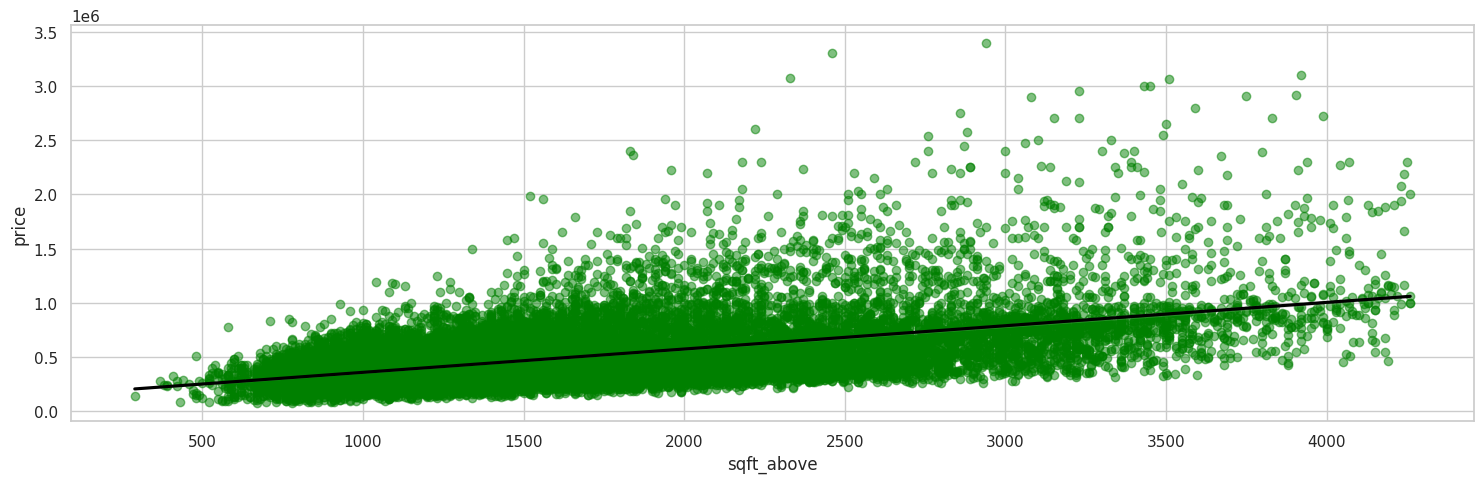

In [47]:
correlation = df['sqft_above'].corr(df['price'])
print(f"\nCorrelation Coefficient Pearson: {correlation:.3f}")

# Check distribution of each variables
plt.figure(figsize=(15, 5))

sns.regplot(x='sqft_above', y='price', data=df,
            scatter_kws={'alpha':0.5, 'color':'green'},
            line_kws={'color': 'black'})

plt.tight_layout()
plt.show()

Hệ số tương quan của hai biến sqft_above và price khá cao (0.528), điều này cho thấy diện tích phần phía trên mặt đất có mối quan hệ tuyến tính dương đối với giá nhà, đường hồi quy tuyến tính cũng nằm trong các điểm dữ liệu, ta nên đưa biến sqft_above vào xây dựng mô hình dự đoán

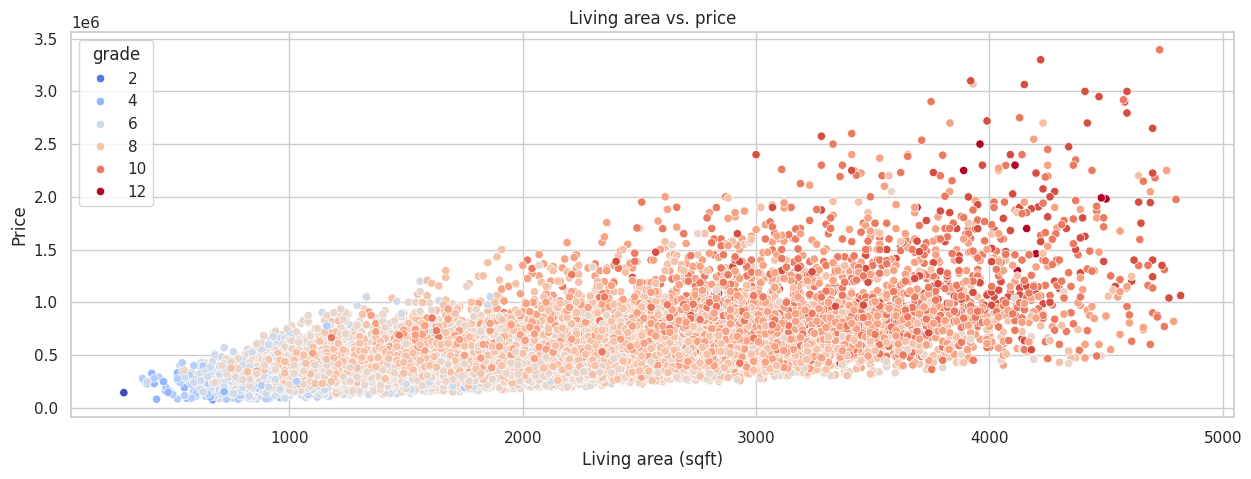

In [48]:
# Scatter plot of sqft living vs price with hue grade
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['sqft_living'], y = df['price'], hue = df['grade'], data = df, palette='coolwarm')
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price')
plt.show()

Ta có thể thấy mỗi liên hệ rõ ràng giữa hai biến grade và sqft_living, diện tích sinh sống lớn thì chất lượng thiết kế và xây dựng cũng lớn dẫn tới giá trị căn nhà phụ thuộc vào hai biến này cũng có giá cao hơn. Các căn nhà có diện tích sống trên khoảng 2500 đều có chất lượng trên mức trung bình.

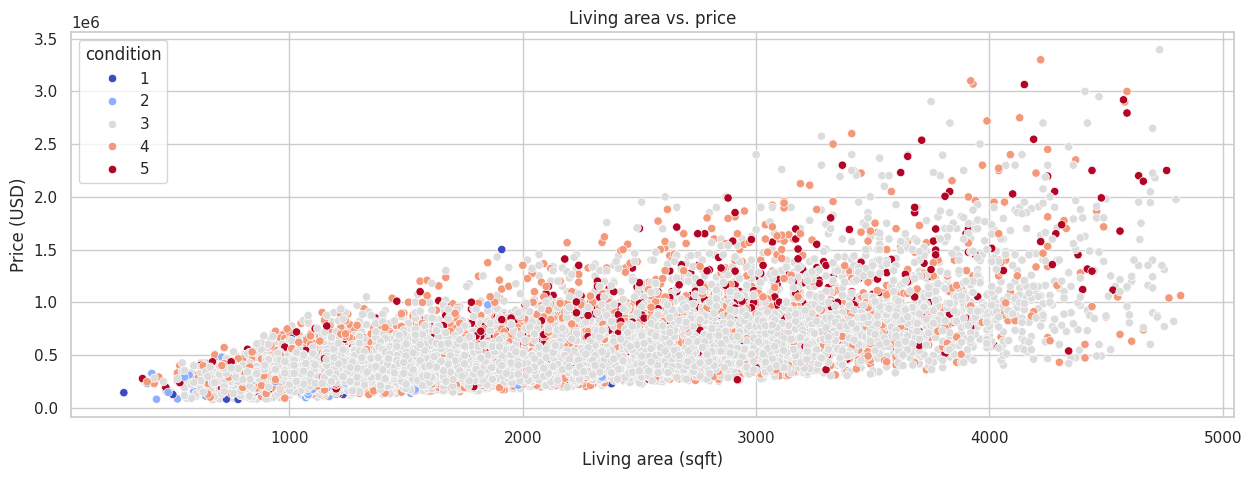

In [49]:
# Scatter plot of sqft living vs price with hue condition
plt.figure(figsize=(15,5))
sns.scatterplot(x = df['sqft_living'], y = df['price'], hue = df['condition'], data = df, palette='coolwarm')
plt.title('Living area vs. price')
plt.xlabel('Living area (sqft)')
plt.ylabel('Price (USD)')
plt.show()

Tương tự cho biến condition, nhưng khi quan sát ta có thế thấy rằng có những căn nhà với condition bằng 5 và có diện tích sinh sống nhỏ thì giá thấp nhưng cùng là condition bằng 5 nhưng diện tích sinh sống lớn thì giá cao, điều này cho thấy biến condition không ảnh hưởng nhiều đến giá căn nhà. Đa số các căn nhà có conditin bằng 3 (ở mức trung bình) nhưng có giá cao hay thấp sẽ phụ thuộc và diện tích sinh sống. Do đó, không nên sử dụng biến này trong mô hình dự đoán giá nhà.

Tiếp theo ta sẽ xem xét ảnh hưởng của ngày đăng bán (date) tới giá nhà

In [50]:
df['sale_month'] = pd.DatetimeIndex(df['date']).month

<ipython-input-51-1166259567>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sale_month', y='price', palette='RdYlBu')


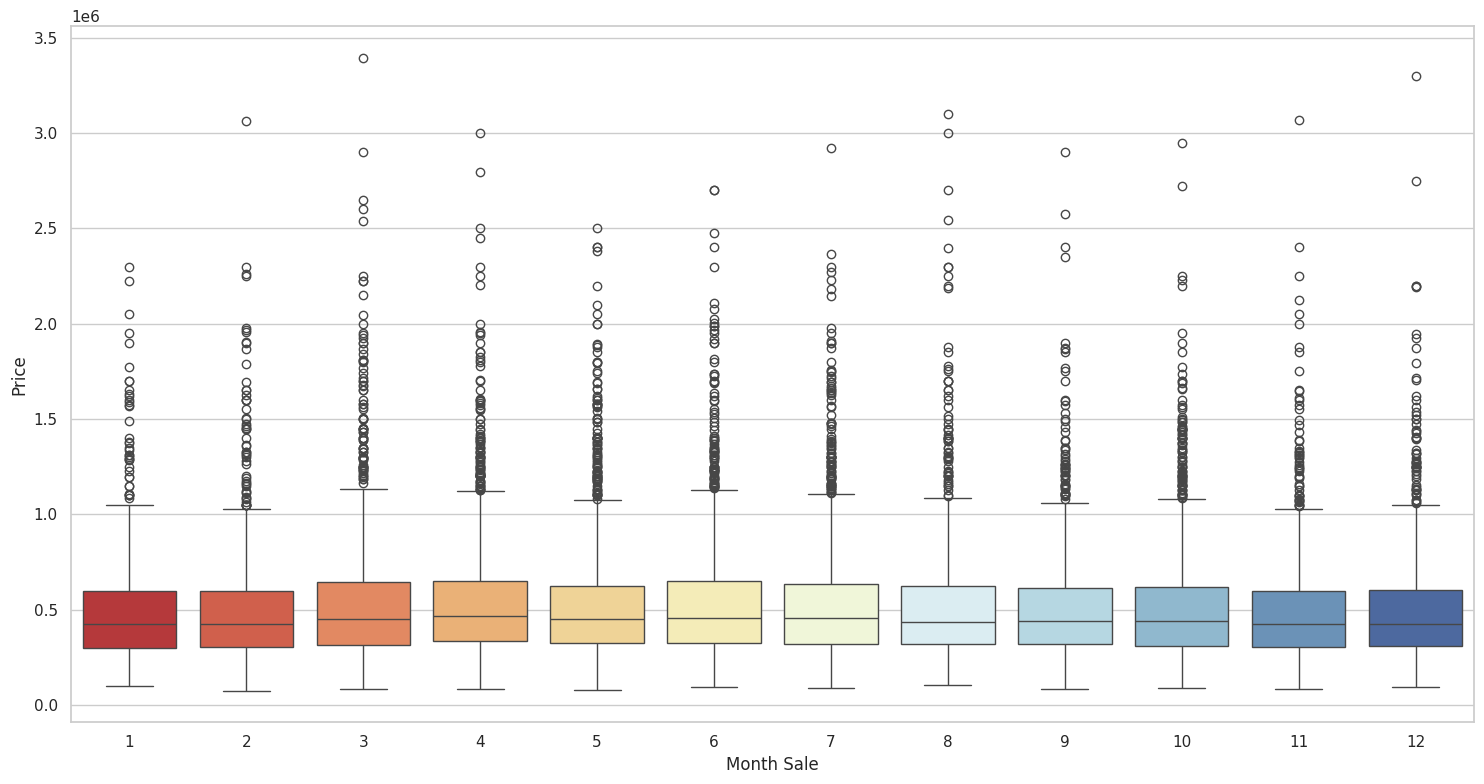

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='sale_month', y='price', palette='RdYlBu')
plt.xlabel('Month Sale')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

Biến date hầu như không có ảnh hưởng hay mối liên hệ rõ ràng tới giá nhà.

<ipython-input-52-4134239693>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sale_month', palette='viridis')


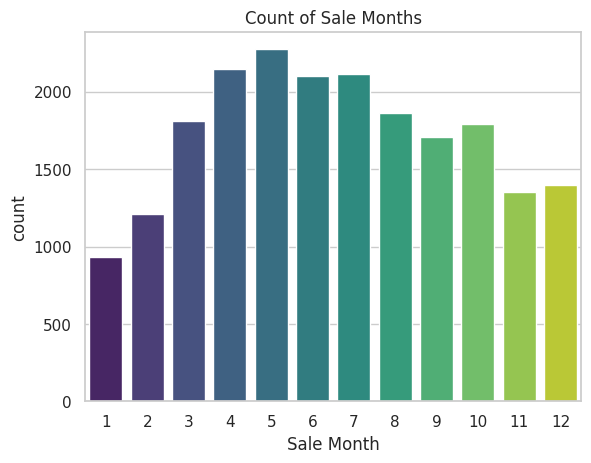

In [52]:
sns.countplot(data=df, x='sale_month', palette='viridis')
plt.xlabel('Sale Month')
plt.title('Count of Sale Months')
plt.show()

Các tháng giữa năm 4,5,6,7 có nhiều người bán nhà. Do vậy, biến date không có vai trò trong dự đoán giá nhà.

In [53]:
df = df.drop(columns=['sale_month'])

Ta tiếp tục xem xét hai biến yr_built và yr_renovated

In [54]:
df['has_renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

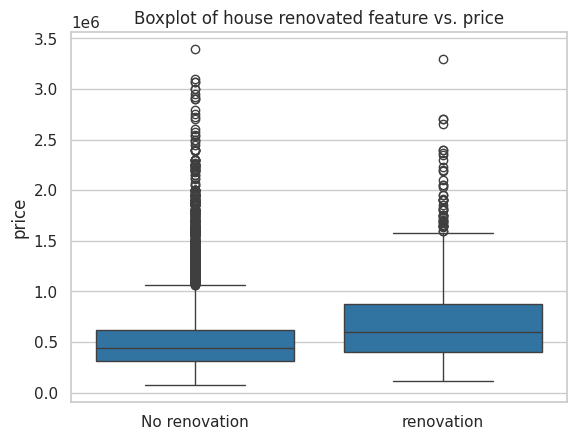

In [55]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df['has_renovated'], y = df['price'])
plt.title("Boxplot of house renovated feature vs. price")
plt.ylabel("price")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No renovation', 'renovation'))
plt.show()

In [56]:
print(f"Proportion of house renovated in dataset: {round(len(df[df['has_renovated']==1])/len(df) * 100, 3)}%")

Proportion of house renovated in dataset: 4.199%


Mặc dù qua biểu đồ ta thấy giá của nhiều căn nhà được cải tạo có giá cao hơn nhưng số căn nhà này chỉ chiếm 4,2% dữ liệu và có những căn nhà chưa bao giờ cải tạo cũng có giá cao gần bằng, ta không nên sử dụng biến này khi dự đoán giá một căn nhà.

In [57]:
df['yr_built'].describe()

,yr_built
count,20695.000000
mean,1970.362020
std,29.424301
min,1900.000000
25%,1951.000000
50%,1973.000000
75%,1996.000000
max,2015.000000


In [58]:
# Tạo bins cho các khoảng năm (từ 1900 đến 2020 với bước 10 năm)
bins = list(range(1900, 2021, 10))  # [1900, 1910, 1920, ..., 2020]

# Tạo labels cho các khoảng
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]  # ['1900-1909', '1910-1919', ...]

# Tạo cột mới với các khoảng phân loại
df['yr_built_category'] = pd.cut(df['yr_built'],
                                bins=bins,
                                labels=labels,
                                include_lowest=True)

<ipython-input-59-3964648898>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='yr_built_category', y='price', palette='coolwarm')


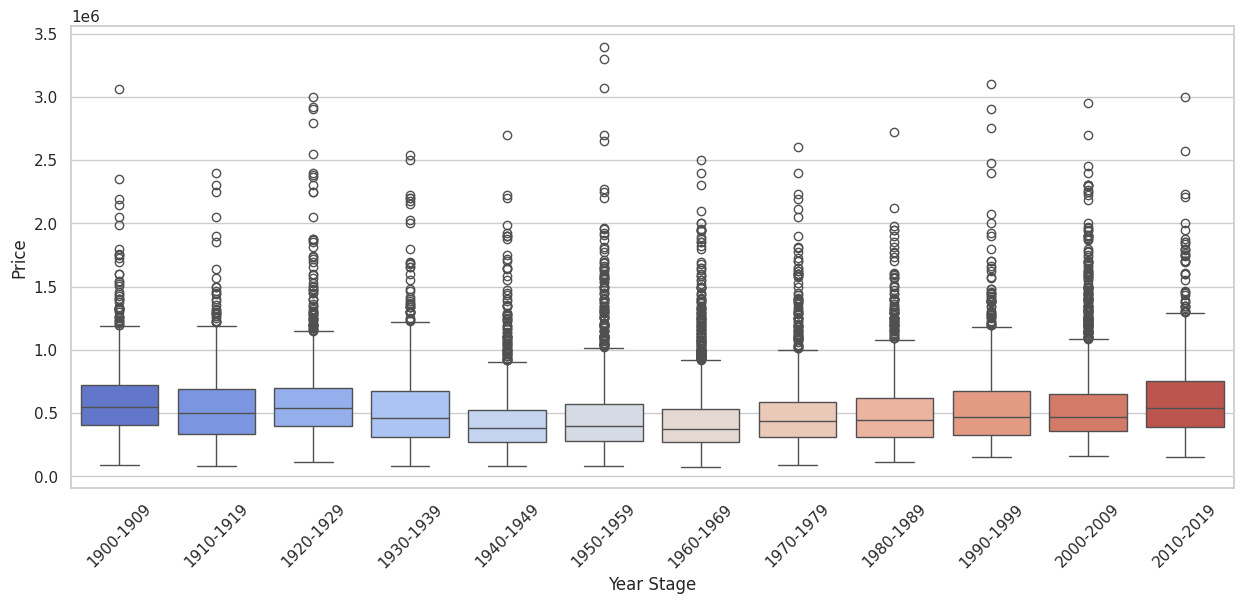

In [59]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='yr_built_category', y='price', palette='coolwarm')
plt.xlabel('Year Stage')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Ta thấy rằng giá nhà phân bố khá đều và bằng nhau mặc dù thời gian xây dựng cách nhau nhiều năm, có những căn nhà xây vào giai đoạn 1900-1909 có giá cao gần ngang với những căn nhà được xây vào giai đoạn 2010-2019. Và cũng không có tình trạng "nhà cổ giá cao" xuất hiện trong tập dữ liệu này. Do đó ta không nên sử dụng biến yr_built trong việc xây dựng mô hinh dự đoán giá nhà.

Ta xem xét yếu tố vị trí địa lý là các biến zipcode, long và lat

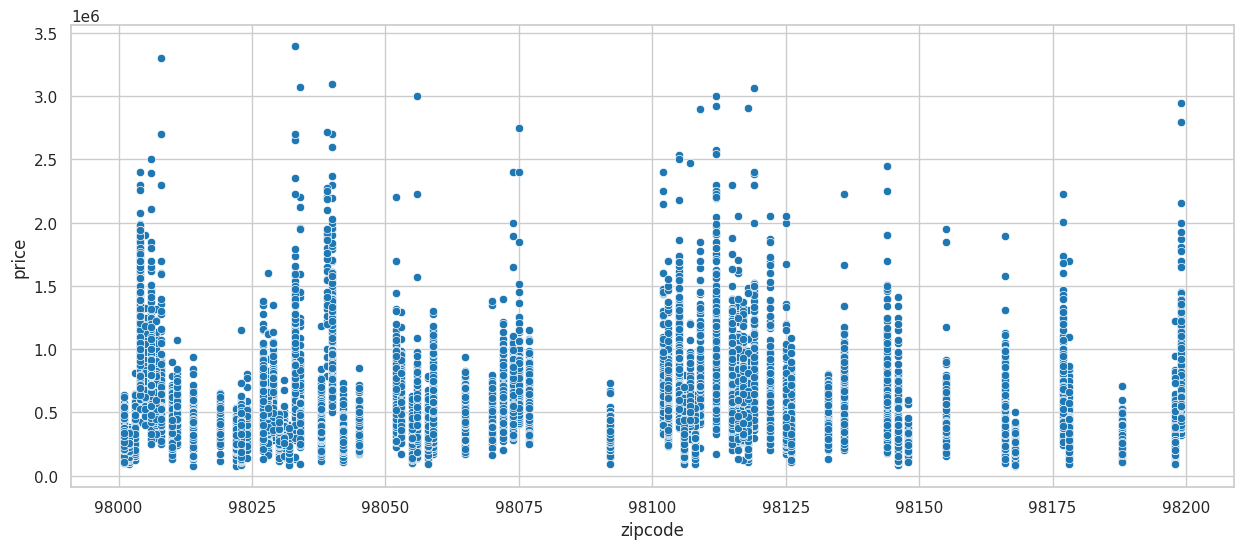

In [60]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='zipcode', y='price')
plt.show()

Ta thấy rằng có giá nhà không có xu hướng cao hay thấp một cách bất thường tại một địa điểm có zipcode cụ thể, chúng phân bố rời rạc và không thể rút ra được gì. Do đó không nên đưa biến zipcode vào dự đoạn giá nhà.

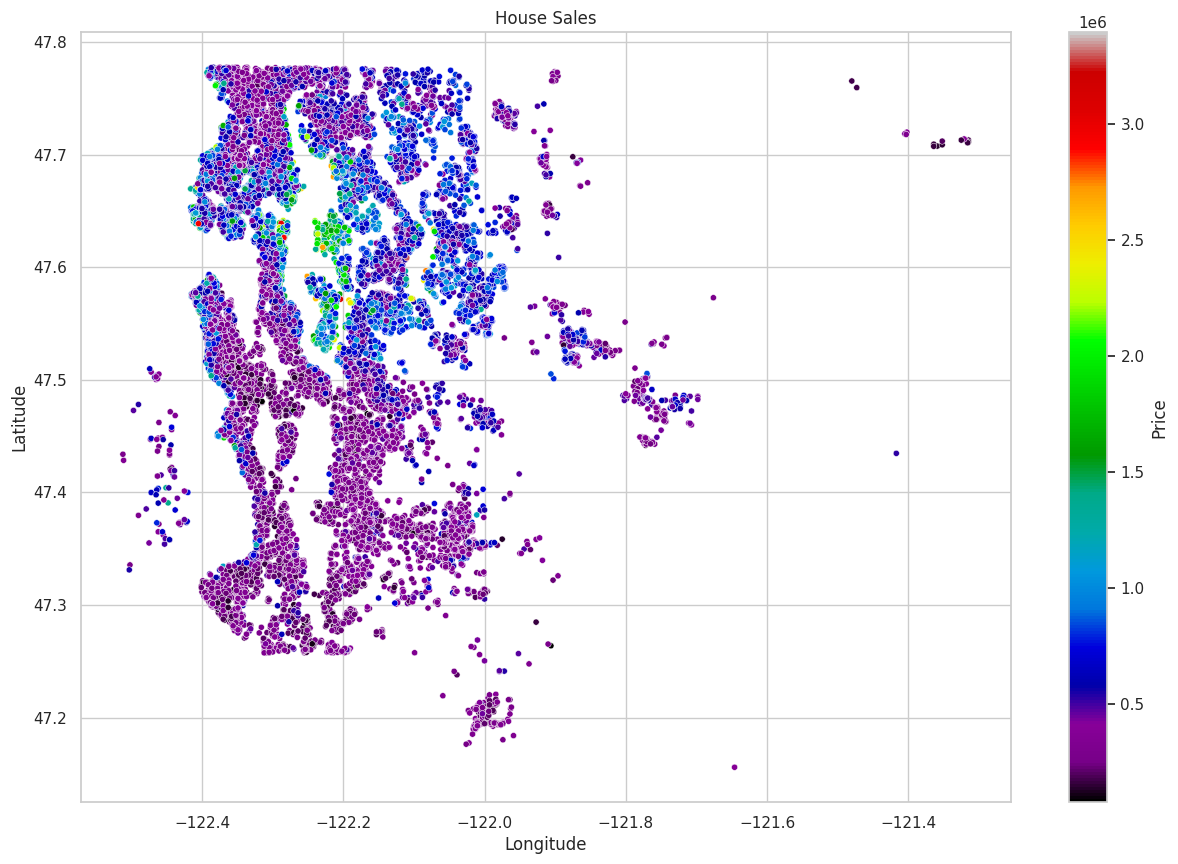

In [61]:
# Tạo figure và axes
fig, ax = plt.subplots(figsize=(15,10))

# Vẽ scatter plot
scatter = sns.scatterplot(data=df,
                         x='long', y='lat',
                         hue='price',
                         palette='nipy_spectral',
                         s=20,
                         legend=None,
                         ax=ax)

# Tạo colorbar
norm = plt.Normalize(df['price'].min(), df['price'].max())
sm = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
sm.set_array([])

# Thêm colorbar vào figure
fig.colorbar(sm, ax=ax, label='Price')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Sales')
plt.show()

Các căn nhà thuộc kinh độ từ khoảng -122,3 đến -122,2 và vĩ độ thuộc từ khoảng 47,5 đến 47,7 có giá cao hơn so với các vị trí khác, nghĩa là giá của căn nhà sẽ bị ảnh hưởng bởi vị trí địa lý. Do đó nên xem xét chọn hai biến long và lat trong dự đoán giá căn nhà.

Ta xem xét hai biến sqft_living15 và sqft_lot15 ảnh hưởng đến giá nhà như thế nào.


Correlation Coefficient Pearson: 0.563


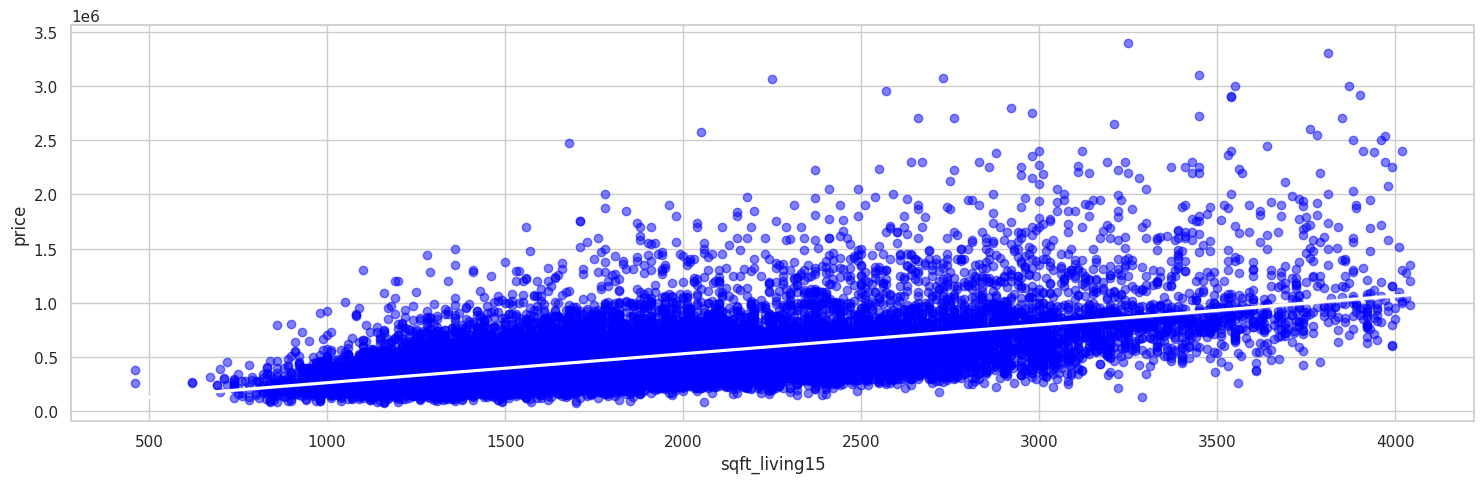

In [62]:
correlation = df['sqft_living15'].corr(df['price'])
print(f"\nCorrelation Coefficient Pearson: {correlation:.3f}")

# Check distribution of each variables
plt.figure(figsize=(15, 5))

sns.regplot(x='sqft_living15', y='price', data=df,
            scatter_kws={'alpha':0.5, 'color':'blue'},
            line_kws={'color': 'white'})

plt.tight_layout()
plt.show()


Correlation Coefficient Pearson: 0.095


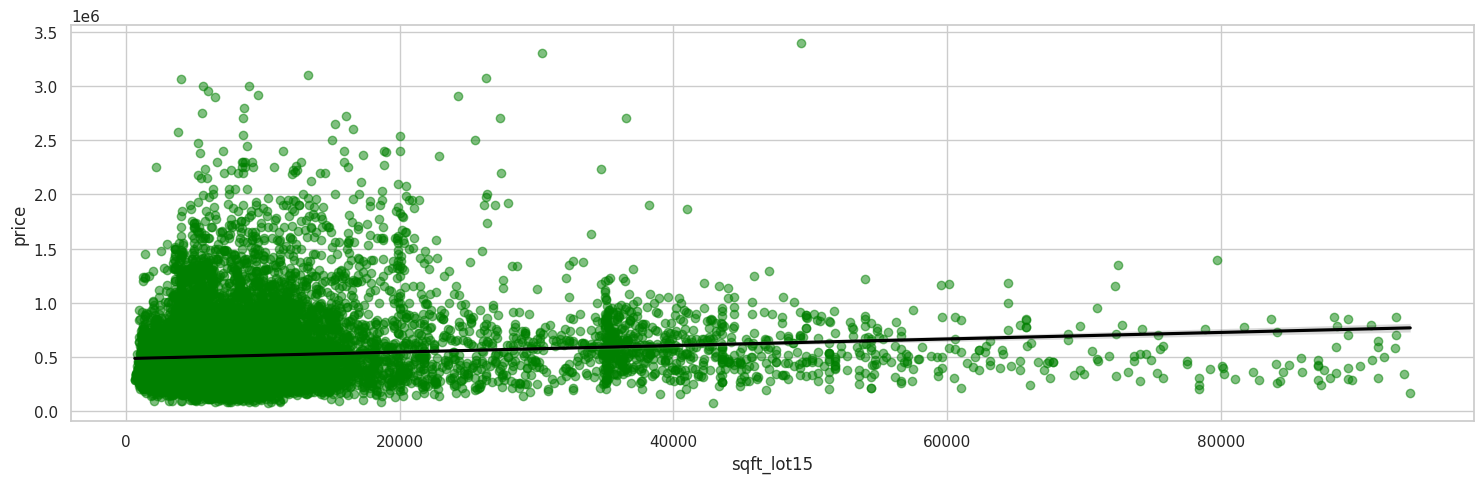

In [63]:
correlation = df['sqft_lot15'].corr(df['price'])
print(f"\nCorrelation Coefficient Pearson: {correlation:.3f}")

# Check distribution of each variables
plt.figure(figsize=(15, 5))

sns.regplot(x='sqft_lot15', y='price', data=df,
            scatter_kws={'alpha':0.5, 'color':'green'},
            line_kws={'color': 'black'})

plt.tight_layout()
plt.show()

Ta thấy biến sqft_living15 có mối quan hệ tuyến tính dương khá cao đối với biến price, do đó nên xem xét đưa sqft_living15 vào mô hình dự đoán. Còn biến sqft_living hầu như không có mối quan hệ tuyến tính đối với biến price, do đó không nên đưa biến này vào mô hình dự đoán

## **5. DATA MODELING**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [65]:
features = ['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_living15','has_basement']
target = 'price'

df = df[features + [target]]

In [66]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

In [67]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [68]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2:", r2_score(y_test, y_pred))

print("Linear Regression:")
evaluate_model(lr_model, X_test, y_test)

print("\nDecision Tree:")
evaluate_model(tree_model, X_test, y_test)

Linear Regression:
MAE: 135812.9754054338
RMSE: 189545.18194449463
R2: 0.5329919064776278

Decision Tree:
MAE: 171862.57930659578
RMSE: 255817.88239604604
R2: 0.14933080263385612


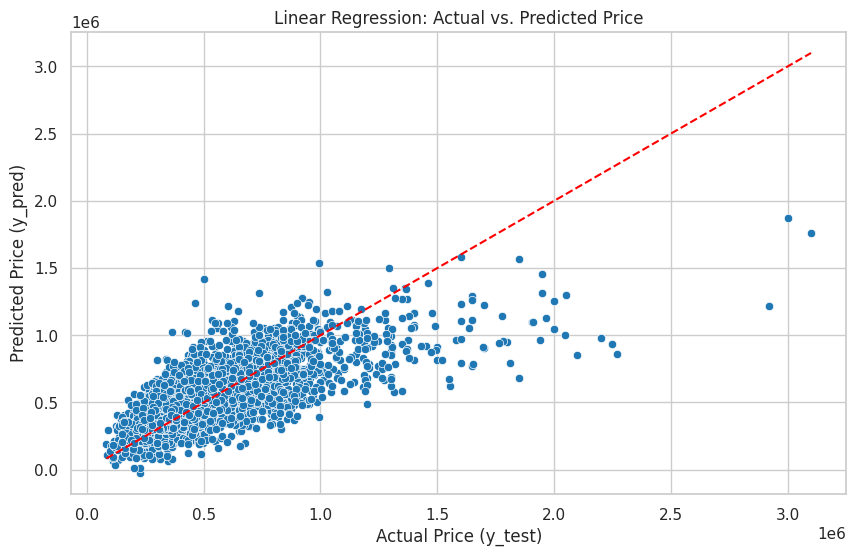

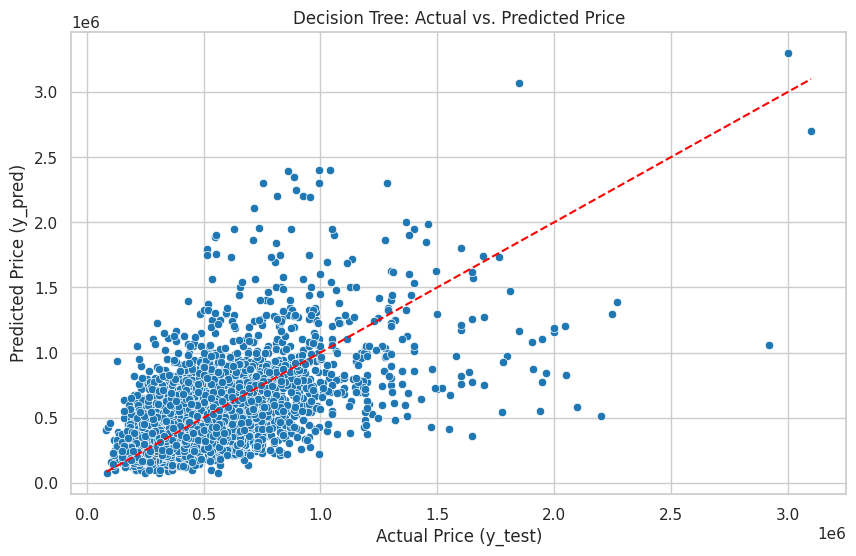

In [72]:
import seaborn as sns

# Get predictions from both models
y_pred_lr = lr_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Plot for Linear Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Linear Regression: Actual vs. Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line for perfect prediction
plt.show()

# Plot for Decision Tree
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_tree)
plt.xlabel("Actual Price (y_test)")
plt.ylabel("Predicted Price (y_pred)")
plt.title("Decision Tree: Actual vs. Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Add a diagonal line for perfect prediction
plt.show()

Bằng trực quan ta thấy các điểm dữ liệu trong đồ thị phân tán 'có vẻ' phù hợp hơn với một đường cong bậc 2 hoặc 3 hơn là một đường thẳng. Ta thử với mô hình hồi quy đa thức (polynomial regresison)

In [79]:
from sklearn.preprocessing import PolynomialFeatures

for degree in range(2,5):
  # create polynomial features
  poly_features = PolynomialFeatures(degree=degree)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)

  # train a linear model on the polynomial features
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)

  # evaluating
  print(f"\nPolynomial Regression (Degree {degree}):")
  y_pred_poly = poly_model.predict(X_test_poly)
  print("MAE:", mean_absolute_error(y_test, y_pred_poly))
  print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
  print("R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression (Degree 2):
MAE: 130677.38465084463
RMSE: 180565.89196685216
R2: 0.5761908359563548

Polynomial Regression (Degree 3):
MAE: 127211.79890367521
RMSE: 177431.16778756972
R2: 0.5907782295672139

Polynomial Regression (Degree 4):
MAE: 129314.88766661817
RMSE: 189253.7170007357
R2: 0.5344270454000053


Nhận xét: Bậc 3 dường như là bậc tốt nhất cho mô hình hồi quy vì có chỉ só R-squared khá lớn cùng với MAE và RMSE nhỏ, nếu càng tăng bậc (degree) thêm thì sẽ gây ra overfitting

Ta thử với XGBoost - Một thuật toán mạnh mẽ trong học máy về dự đoán

In [80]:
from xgboost import XGBRegressor

# create and train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
print("\nXGBoost Regression:")
y_pred_xgb = xgb_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2:", r2_score(y_test, y_pred_xgb))


XGBoost Regression:
MAE: 125234.64672550737
RMSE: 177569.55687811523
R2: 0.5901396279662784


Nhận xét: XGBoost cũng có các chỉ số đánh giá gần nhưu giống hệt só với mô hình Polynomial Regression do đó ta có thể kết luận rằng có thể dùng mô hình Polynomial Regression bậc 3 cho tập dữ liệu này là một lựa chọn khá tốt